# Spray Sample Distribution

In [1]:
from util.spray_util import load_spray_df

spray_directory = "../res/sprays"
df = load_spray_df(spray_directory)

df

,match_id,map_id,player_id,filename,length
0,92650,0,76561198257770857,95.npy,9
1,92650,0,76561198257770857,97.npy,7
2,92650,0,76561198257770857,96.npy,9
3,92650,0,76561198257770857,98.npy,15
4,92650,0,76561198257770857,102.npy,5
...,...,...,...,...,...
49997,92419,1,76561198851073805,112.npy,11
49998,92419,1,76561198174431453,79.npy,6
49999,92419,1,76561198174431453,77.npy,12
50000,92419,1,76561198174431453,67.npy,6


In [2]:
print("unique players:", len(df.player_id.unique()))

unique players: 1065


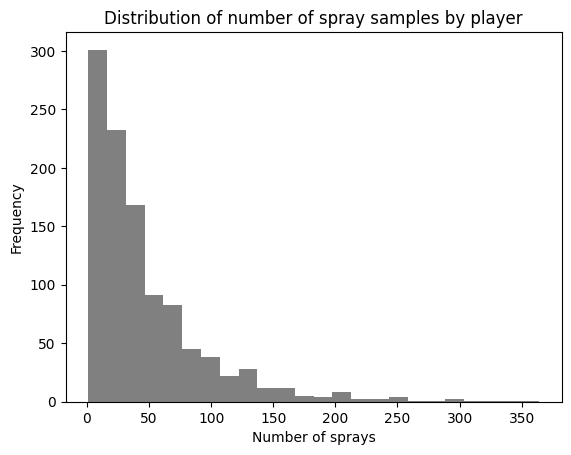

In [3]:
from matplotlib import pyplot as plt

df.groupby("player_id").size().plot(kind="hist", color="gray", xlabel="Number of sprays",
                                    title="Distribution of number of spray samples by player",
                                    bins=24)
plt.show()

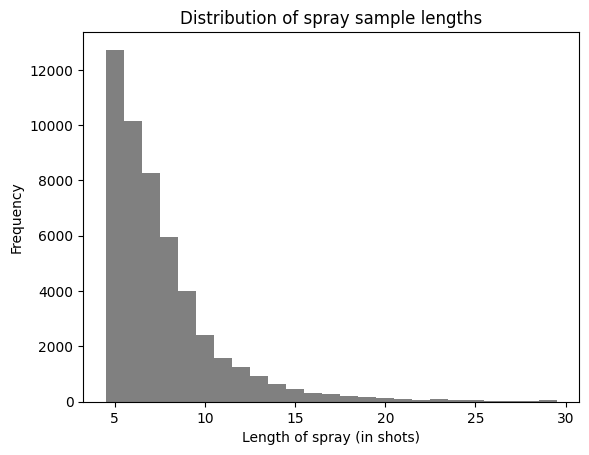

In [4]:
plt.hist(df["length"], bins=25, align="left", color="gray")
plt.xlabel("Length of spray (in shots)")
plt.ylabel("Frequency")
plt.title("Distribution of spray sample lengths")
plt.show()

In [5]:
total_shots = int(df["length"].sum())
print("total shots", total_shots)

# rds * mins/rds = mins
total_mins = (total_shots - df.shape[0]) / 60
print("total minutes", total_mins)

total_hours = total_mins / 60
print("total hours", total_hours)

total shots 382840
total minutes 5547.3
total hours 92.455


In [6]:
total_matches = int(df["match_id"].unique().shape[0])
print("total matches", total_matches)

total_maps = int(df[["match_id", "map_id"]].drop_duplicates().shape[0])
print("total maps", total_maps)

total matches 522
total maps 1012


# Spray Shot Distribution

In [7]:
import os

import numpy as np

# limit sprays to first few bullets
max_length = 5
filtered_df = df[df["length"] <= max_length].reset_index(drop=True)

data = []
for i, row in filtered_df.iterrows():
    filename = f"{row.match_id}/{row.map_id}/{row.player_id}/{row.filename}"
    filepath = os.path.join(spray_directory, filename)
    array = np.load(filepath)
    data.append(array)

len(data)

12728

In [8]:
pitches = []
yaws = []
for spray in data:
    pitches.extend(spray[1:, 0])
    yaws.extend(spray[1:, 1])

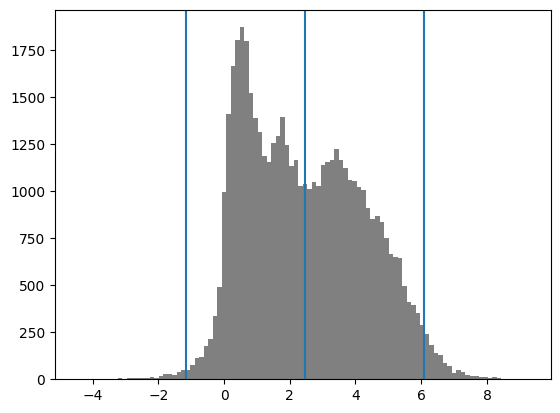

In [9]:
pitches_mean, pitches_std = np.mean(pitches), np.std(pitches)
plt.hist(pitches, bins=100, color="gray")
plt.axvline(pitches_mean)
plt.axvline(pitches_mean - 2 * pitches_std)
plt.axvline(pitches_mean + 2 * pitches_std)
plt.show()

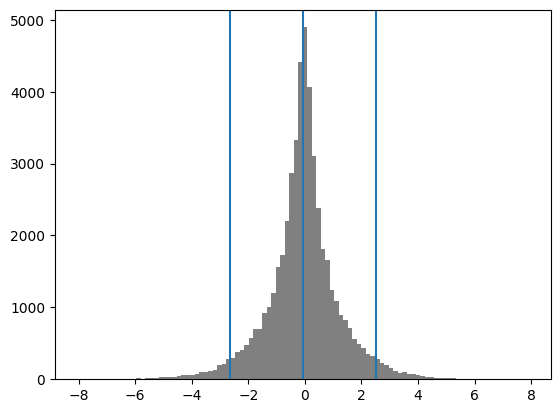

In [10]:
yaws_mean, yaws_std = np.mean(yaws), np.std(yaws)
plt.hist(yaws, bins=100, color="gray")
plt.axvline(yaws_mean)
plt.axvline(yaws_mean - 2 * yaws_std)
plt.axvline(yaws_mean + 2 * yaws_std)
plt.show()

In [11]:
max_abs_pitches = []
max_abs_yaws = []
for spray in data:
    max_abs_pitches.append(np.max(np.abs(spray[:, 0])))
    max_abs_yaws.append(np.max(np.abs(spray[:, 1])))

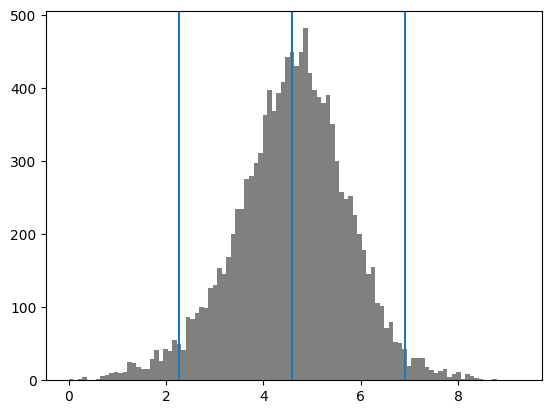

In [12]:
max_abs_pitches_mean, max_abs_pitches_std = np.mean(max_abs_pitches), np.std(max_abs_pitches)
plt.hist(max_abs_pitches, bins=100, color="gray")
plt.axvline(max_abs_pitches_mean)
plt.axvline(max_abs_pitches_mean - 2 * max_abs_pitches_std)
plt.axvline(max_abs_pitches_mean + 2 * max_abs_pitches_std)
plt.show()

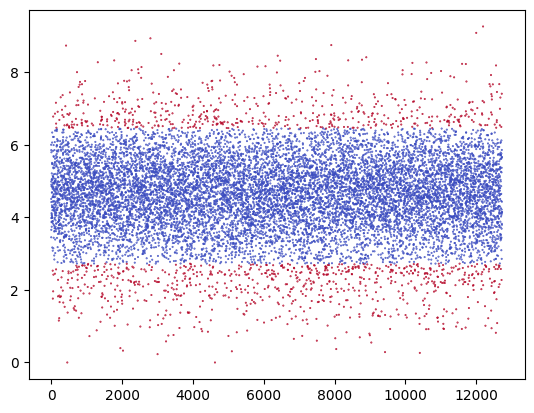

In [13]:
alpha = 1.6
max_abs_pitches_outliers = (max_abs_pitches > max_abs_pitches_mean + alpha * max_abs_pitches_std) | \
                           (max_abs_pitches < max_abs_pitches_mean - alpha * max_abs_pitches_std)

plt.scatter(np.arange(len(max_abs_pitches)), max_abs_pitches, s=0.2, c=max_abs_pitches_outliers, cmap="coolwarm")
plt.show()

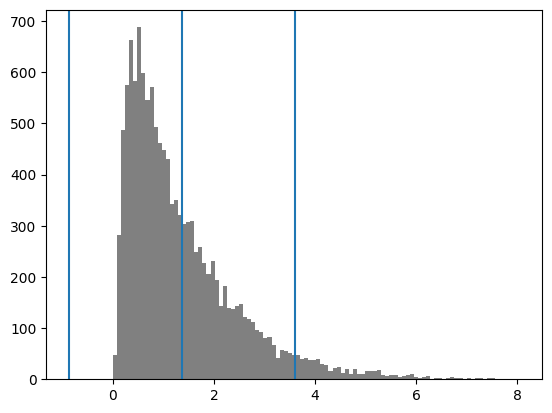

In [14]:
max_abs_yaws_mean, max_abs_yaws_std = np.mean(max_abs_yaws), np.std(max_abs_yaws)
plt.hist(max_abs_yaws, bins=100, color="gray")
plt.axvline(max_abs_yaws_mean)
plt.axvline(max_abs_yaws_mean - 2 * max_abs_yaws_std)
plt.axvline(max_abs_yaws_mean + 2 * max_abs_yaws_std)
plt.show()

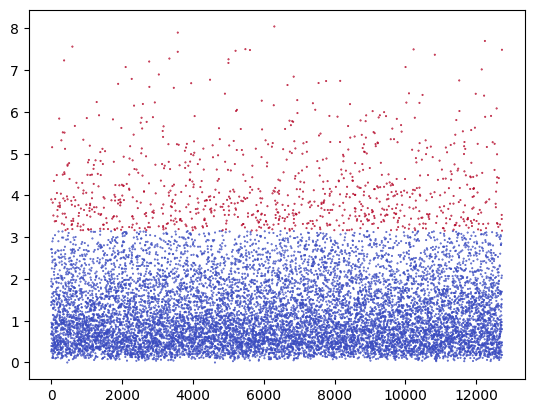

In [15]:
beta = 1.6
max_abs_yaws_outliers = (max_abs_yaws > max_abs_yaws_mean + beta * max_abs_yaws_std) | \
                        (max_abs_yaws < max_abs_yaws_mean - beta * max_abs_yaws_std)

plt.scatter(np.arange(len(max_abs_yaws)), max_abs_yaws, s=0.2, c=max_abs_yaws_outliers, cmap="coolwarm")
plt.show()

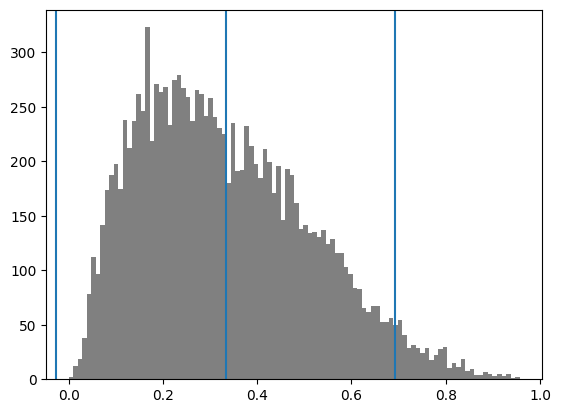

In [16]:
log_max_abs_yaws = np.log10(np.add(1, max_abs_yaws))
log_max_abs_yaws_mean, log_max_abs_yaws_std = np.mean(log_max_abs_yaws), np.std(log_max_abs_yaws)
plt.hist(log_max_abs_yaws, bins=100, color="gray")
plt.axvline(log_max_abs_yaws_mean)
plt.axvline(log_max_abs_yaws_mean - 2 * log_max_abs_yaws_std)
plt.axvline(log_max_abs_yaws_mean + 2 * log_max_abs_yaws_std)
plt.show()

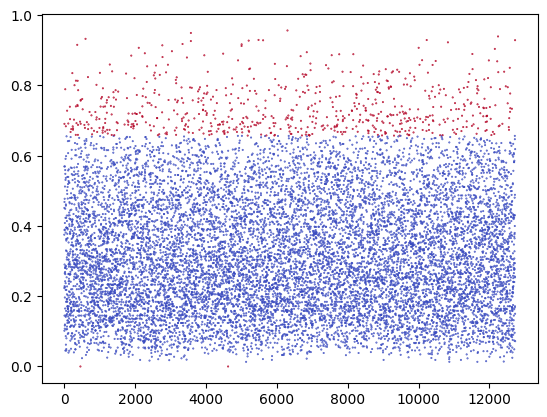

In [17]:
gamma = 1.8
log_max_abs_yaws_outliers = (log_max_abs_yaws > log_max_abs_yaws_mean + gamma * log_max_abs_yaws_std) | \
                            (log_max_abs_yaws < log_max_abs_yaws_mean - gamma * log_max_abs_yaws_std)

plt.scatter(np.arange(len(log_max_abs_yaws)), log_max_abs_yaws, s=0.2, c=log_max_abs_yaws_outliers, cmap="coolwarm")
plt.show()

In [18]:
outliers = max_abs_pitches_outliers | max_abs_yaws_outliers
print("outliers:", len(filtered_df[outliers]))

filtered_df_no_outliers = filtered_df[~outliers]
filtered_df_no_outliers

outliers: 2123


,match_id,map_id,player_id,filename,length
0,92650,0,76561198257770857,102.npy,5
1,92650,0,76561199016517194,155.npy,5
2,92650,0,76561199016517194,163.npy,5
3,92650,0,76561198453919902,140.npy,5
4,92650,0,76561198049794434,65.npy,5
...,...,...,...,...,...
12721,92419,0,76561198174431453,88.npy,5
12722,92419,0,76561198174431453,73.npy,5
12723,92419,1,76561197988130768,5.npy,5
12725,92419,1,76561198112274081,48.npy,5


In [19]:
print("unique players:", len(filtered_df_no_outliers.player_id.unique()))

np.save("../res/outliers.npy", outliers)
filtered_df_no_outliers.to_csv("../res/spray_df_no_outliers.csv")

unique players: 1003


# Shot Distribution

(12728, 5, 2)


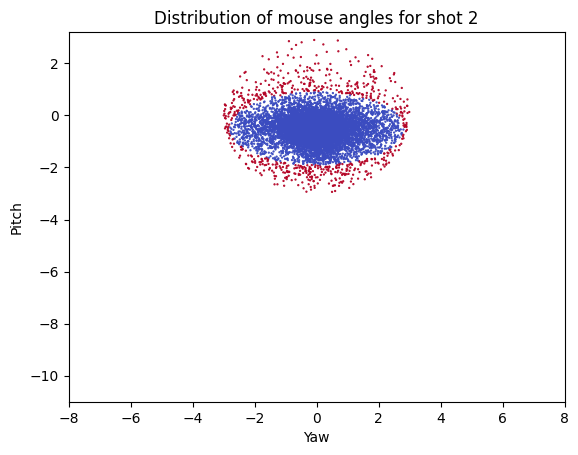

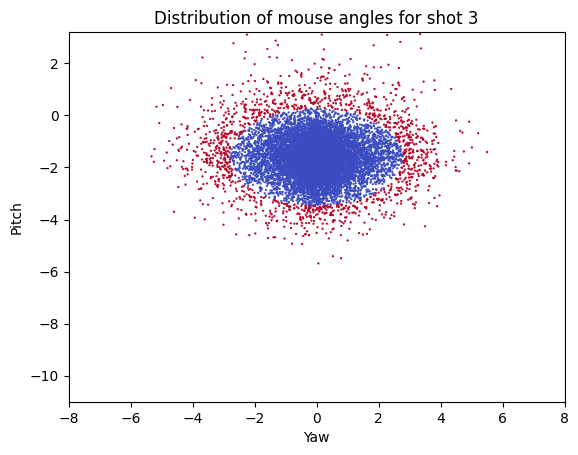

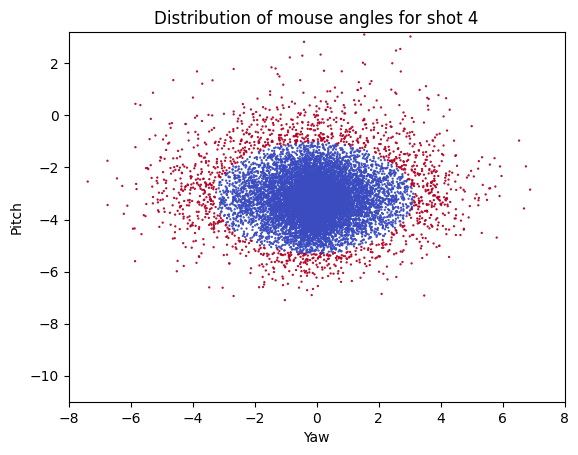

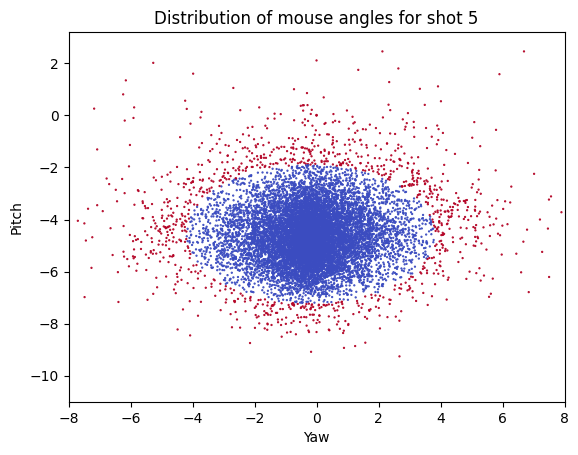

In [20]:
shots = np.stack(data)
print(shots.shape)

shots_mean = np.mean(shots, axis=0)

scale_factors = np.array([
    [1, 1],
    [2, 1],
    [1.5, 1],
    [1.5, 1],
    [1.5, 1]
])
threshold = np.array([1, 2.8, 2.8, 3.2, 4])
shots_centered = (shots - shots_mean) * scale_factors
distance_from_origin = np.sqrt(np.sum(np.square(shots_centered), axis=-1))
shots_outliers = distance_from_origin > threshold


def plot_bullets(shot_i):
    x, y, c = [], [], []

    for shot, shot_outliers in zip(shots, shots_outliers):
        x.append(shot[shot_i, 1])
        y.append(-shot[shot_i, 0])
        c.append(1 if shot_outliers[shot_i] else 0)
    plt.scatter(x, y, c=c, s=0.4, cmap="coolwarm")
    plt.xlabel("Yaw")
    plt.ylabel("Pitch")
    plt.title(f"Distribution of mouse angles for shot {shot_i + 1}")
    plt.xlim(-8, 8)
    plt.ylim(-11, 3.2)
    plt.show()


# shot 1 is always at (0, 0)
# plot_bullets(0)
plot_bullets(1)
plot_bullets(2)
plot_bullets(3)
plot_bullets(4)

In [21]:
shots_filtered = shots[~np.any(shots_outliers, axis=1)]
shots_filtered.shape

(10451, 5, 2)

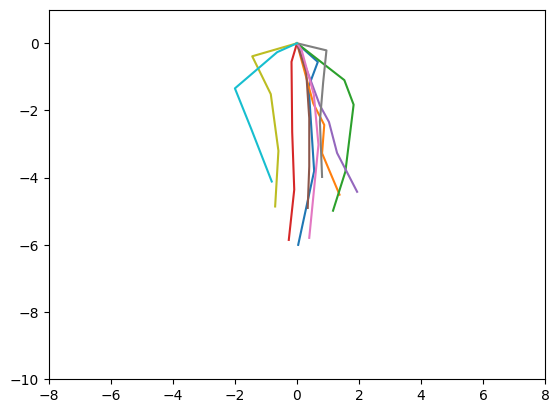

In [22]:
for spray in shots_filtered[:10]:
    plt.plot(spray[:, 1], -spray[:, 0])
plt.xlim(-8, 8)
plt.ylim(-10, 1)
plt.show()